카이제곱 검정

In [4]:
from scipy import stats

# data1 과 data2 가 같은지 다른지 알고싶다.
# 귀무가설 (zero가설, 0가설) : 두 데이터는 차이가 없다.
# 대립가설 (대립가설 채택이유는 pvalue가 0.05보다 작을때) : 두 데이터는 차이가 있다.

data1 = [4, 6, 17, 16, 8, 9]
data2 = [10, 10, 10, 10, 10, 10]
chis = stats.chisquare(data1, data2) # chisquare 카이제곱검정함수

chis
# pvalue가 0.05보다 작으므로 귀무가설 기각, 대립가설 채택
# Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)
# statistic 검정통계량, pvalue 유의확률

Power_divergenceResult(statistic=14.200000000000001, pvalue=0.014387678176921308)

In [2]:
import pandas as pd
from scipy import stats

# 귀무가설 : 흡연습관과 운동횟수에는 상관관계가 없다.
# 대립가설 : 흡연습관과 운동횟수에는 상관관계가 있다.

survey = pd.read_csv('D:/workspace/Python2/data/survey.csv')

data = pd.crosstab(survey.Smoke, survey.Exer)
print(data)

result = stats.chi2_contingency(observed = data)
print(result[0]) # 검정통계량
print(result[1]) # p-value

Exer   Freq  None  Some
Smoke                  
Heavy     7     1     3
Never    87    18    84
Occas    12     3     4
Regul     9     1     7
5.488545890584232
0.48284216946545633


<Axes: >

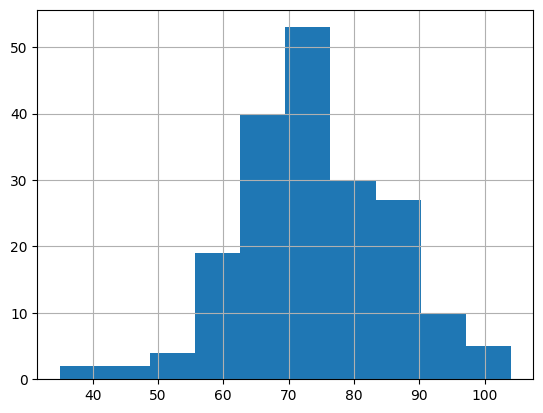

In [3]:
survey["Pulse"].hist() # 히스토그램
# 정규분포

<Axes: >

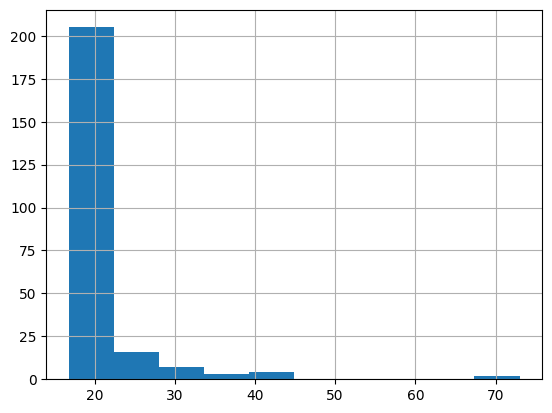

In [4]:
survey["Age"].hist()
# 비정규분포

단일표본 t검정

In [9]:
import numpy as np
from scipy import stats

# 귀무가설 : 학생들의 평균키는 175cm이다.
# 대립가설 : 학생들의 평규키는 175cm가 아니다.

np.random.seed(1) # 랜덤시드(기준값) 고정, 재현성
heights = [180 + np.random.normal(0, 5) for a in range(20)]
# np.random.normal(0, 5) : 평균 0, 표준편차 5인 난수 (정규분포)
result = stats.ttest_1samp(heights, 175) # ttest_1samp = 1samp : 단일표본, ttest : t검정
print("검정통계량 : %.3f, p-value : %.3f" % result)

검정통계량 : 3.435, p-value : 0.003


독립표본 t검정

In [12]:
import numpy as np
from scipy import stats

# 귀무가설 : 두 그룹 학생들의 평균키는 같다.
# 대립가설 : 두 그룹 학생들의 평균키는 같지 않다.

np.random.seed(1)
# 그룹1 : 평균 170, 표준편차 5
group1 = [170 + np.random.normal(0, 5) for a in range(20)]
# 그룹2 : 평균 175, 표준편차 10
group2 = [175 + np.random.normal(0, 10) for a in range(20)]
print(group1)
print(group2)
print("group1의 평균:", np.mean(group1))
print("group2의 평균:", np.mean(group2))
result1 = stats.ttest_ind(group1, group2)
print("검정통계량 : %.3f, p-value : %.3f" % result1)

[178.1217268183162, 166.94121793174963, 167.35914123868272, 164.63515688921916, 174.32703814662338, 158.49230651559859, 178.7240588210824, 166.19396549552448, 171.5951954802855, 168.75314812261294, 177.31053968522488, 159.69929645251173, 168.38791397993245, 168.07972822665792, 175.6688472116772, 164.50054366342985, 169.13785896224783, 165.61070791039313, 170.21106873357797, 172.9140760685791]
[163.99380822787077, 186.44723709839613, 184.01590720592796, 180.0249433890187, 184.0085594926441, 168.16272140825666, 173.77109774481352, 165.6423056574093, 172.32111920373984, 180.30355466738186, 168.08339248274692, 171.03246473144023, 168.128272998804, 166.5479435850128, 168.28753869163182, 174.873354010811, 163.82689651364723, 177.34415697817093, 191.5980217710987, 182.42044160577336]
group1의 평균: 169.33317681769637
group2의 평균: 174.54168687322976
검정통계량 : -2.329, p-value : 0.025


대응표본 t검정

In [13]:
import numpy as np
from scipy import stats

# 귀무 가설 : 복용 전후의 체중 차이가 없다.
# 대립 가설 : 복용 전후의 체중 차이가 있다.

np.random.seed(1)

# 복용전 : 평균 60, 표준편차 5
before = [60 + np.random.normal(0, 5) for _ in range(20)] # _ 밑줄 변수는 단순 카운트용으로 많이 쓰인다.
print(before)

# 복용후 : 평균 복용전 체중 x 0.99, 표준편차 0.02
after = [w * np.random.normal(0.99, 0.02) for w in before]
print(after)

result = stats.ttest_rel(before, after)
print("검정통계량: %.3f, p-value: %.3f" % result)

[68.1217268183162, 56.94121793174962, 57.359141238682724, 54.63515688921915, 64.3270381466234, 48.492306515598585, 68.7240588210824, 56.19396549552449, 61.59519548028549, 58.75314812261295, 67.31053968522487, 49.69929645251173, 58.38791397993246, 58.07972822665792, 65.66884721167719, 54.500543663429845, 59.13785896224782, 55.61070791039314, 60.21106873357797, 62.914076068579114]
[65.94098797171107, 57.67544499710449, 57.819839215935254, 54.63788246116392, 64.84275566541605, 47.34427263203588, 67.86790793112998, 54.58033393455883, 60.64923115285458, 58.78881770728494, 65.70631311881824, 48.80793606499072, 57.001583230054315, 56.517144665313666, 64.13055954741337, 53.94173367626836, 57.224973536332286, 55.315321289307555, 61.60772730564428, 63.218635763189475]
검정통계량: 2.915, p-value: 0.009


아노바 분석

a 평균: 79.0
b 평균: 65.375
c 평균: 64.375
d 평균: 69.5


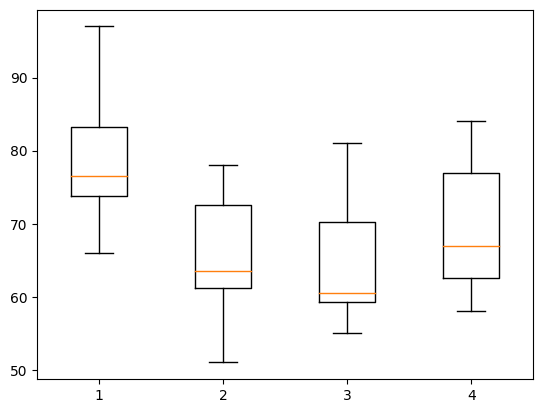

4.2210931159803815 0.013933707427484204


In [15]:
# 귀무가설 : 4개의 교육훈련 기법간의 차이가 없다.
# 대립가설 : 4개의 교육훈련 기법간의 차이가 있다.
import scipy.stats as stats
import matplotlib.pyplot as plt

a = [66, 74, 82, 75, 73, 97, 87, 78]
b = [72, 51, 59, 62, 74, 64, 78, 63]
c = [61, 60, 57, 60, 81, 55, 70 ,71]
d = [63, 61, 76, 84, 58, 65, 69, 80]

print("a 평균:", np.mean(a))
print("b 평균:", np.mean(b))
print("c 평균:", np.mean(c))
print("d 평균:", np.mean(d))

plot_data = [a, b, c, d]
plt.boxplot(plot_data)
plt.show()

f, p = stats.f_oneway(a, b, c, d)
print(f, p)

In [18]:
import pandas as pd
from scipy import stats

# 귀무가설 : 세가지 비료의 수확량은 차이가 없다.
# 대립가설 : 세가지 비료의 수확량은 차이가 있다.

data = pd.read_csv("D:/workspace/Python2/data/fertilizers.csv")
print(data)
result = stats.f_oneway(data["fertilizer1"], data["fertilizer2"], data["fertilizer3"])
print(result)
print(result[0]) # 통계량
print(result[1]) # p-value

   fertilizer1  fertilizer2  fertilizer3
0           72           54           48
1           62           56           62
2           90           58           92
3           42           36           96
4           84           72           92
5           64           34           80
F_onewayResult(statistic=3.7551268418654105, pvalue=0.04762461989261837)
3.7551268418654105
0.04762461989261837
